In [1]:
import pandas as pd
import numpy as np

# Read CSV data into a pandas DataFrame
df = pd.read_csv('complete_dataset.csv', low_memory=False)

#Introduction
#For this assignment, I have selected a dataset containing FIFA 18 player data. The dataset provides comprehensive information about various attributes and characteristics of professional soccer players. As an avid FIFA player and a passionate football enthusiast, I chose this dataset due to my deep interest in understanding the factors that contribute to a player's value in the transfer market. By analyzing this dataset, I aim to develop a predictive model that can estimate the monetary value of a player based on their attributes, skills, and performance metrics.

#The dataset includes a wide range of variables, such as player's age, nationality, overall rating, potential, preferred positions, club affiliation, and various player attributes like dribbling, shooting, pace, and more. In addition, the dataset also provides information about the players' market value and wages. By considering these variables, I can explore the relationships between player attributes and their market value, gaining insights into the factors that impact a player's worth in the transfer market.

#Through this analysis, I hope to uncover valuable insights that can aid in player valuation, scouting, and team-building strategies. By leveraging machine learning techniques, particularly the Random Forest algorithm, I aim to create a predictive model that can accurately estimate a player's value based on their attributes. This research has the potential to provide valuable insights to football clubs, scouts, and agents in making informed decisions regarding player transfers and contract negotiations.

#data cleaning 1
#In the initial phase of data cleaning, we aimed to handle missing values present in the dataset. To accomplish this, we replaced all the blank entries in the DataFrame with NaN (Not a Number) using regular expressions. This step ensured that missing values were consistently represented throughout the dataset. Subsequently, we replaced all instances of NaN with 0, providing a standardized representation for missing values across the dataset. Additionally, we renamed the column "Unnamed: 0" to "id" for improved clarity and consistency in column names.

# replace all the blank entries with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.replace(np.nan, 0, regex=True)

df = df.rename(columns={"Unnamed: 0": "id"})

# Print the unique columns
print(df.head())

   id               Name  Age  \
0   0  Cristiano Ronaldo   32   
1   1           L. Messi   30   
2   2             Neymar   25   
3   3          L. Suárez   30   
4   4           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club         

In [2]:
df = df.drop(columns=['Photo', 'Flag', 'Club Logo'])
print(df.head())

   id               Name  Age Nationality  Overall  Potential  \
0   0  Cristiano Ronaldo   32    Portugal       94         94   
1   1           L. Messi   30   Argentina       93         93   
2   2             Neymar   25      Brazil       92         94   
3   3          L. Suárez   30     Uruguay       92         92   
4   4           M. Neuer   31     Germany       92         92   

                  Club   Value   Wage  Special  ...    RB   RCB   RCM   RDM  \
0       Real Madrid CF  €95.5M  €565K     2228  ...  61.0  53.0  82.0  62.0   
1         FC Barcelona   €105M  €565K     2154  ...  57.0  45.0  84.0  59.0   
2  Paris Saint-Germain   €123M  €280K     2100  ...  59.0  46.0  79.0  59.0   
3         FC Barcelona    €97M  €510K     2291  ...  64.0  58.0  80.0  65.0   
4     FC Bayern Munich    €61M  €230K     1493  ...   0.0   0.0   0.0   0.0   

     RF    RM    RS    RW   RWB    ST  
0  91.0  89.0  92.0  91.0  66.0  92.0  
1  92.0  90.0  88.0  91.0  62.0  88.0  
2  88.0  87.0 

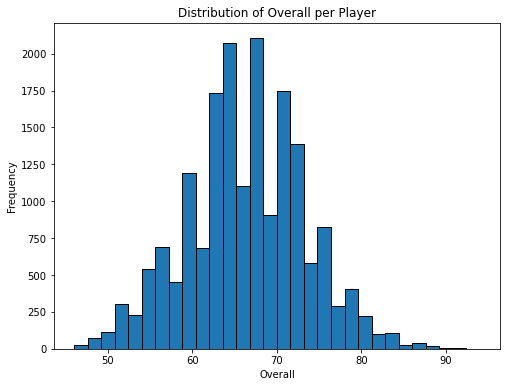

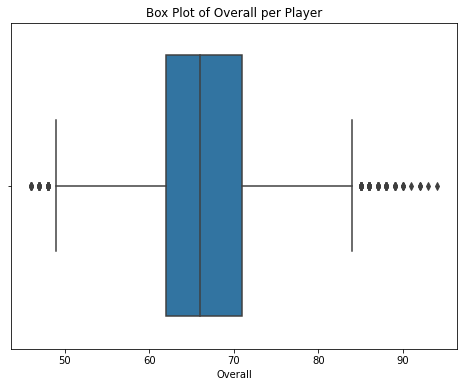

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram This code plots the histogram graph based on the average steps taken
plt.figure(figsize=(8, 6))
plt.hist(df['Overall'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Overall per Player')
plt.xlabel('Overall')
plt.ylabel('Frequency')
plt.show()

# Boxplot This code plots the boxplot graph based on the data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Overall'].dropna())
plt.title('Box Plot of Overall per Player')
plt.xlabel('Overall')
plt.show()

In [4]:
#the mayority of the plays will be around 70 or lower
summary_stats = df['Overall'].describe()
print(summary_stats)

count    17981.000000
mean        66.247984
std          6.987965
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64


In [5]:
# Mean
mean = df['Overall'].mean()
print('Mean: ', mean)

# Median
median = df['Overall'].median()
print('Median: ', median)

# Standard Deviation
std_dev = df['Overall'].std()
print('Standard Deviation: ', std_dev)

Mean:  66.24798398309326
Median:  66.0
Standard Deviation:  6.987965339747166


/Users/jimverheyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


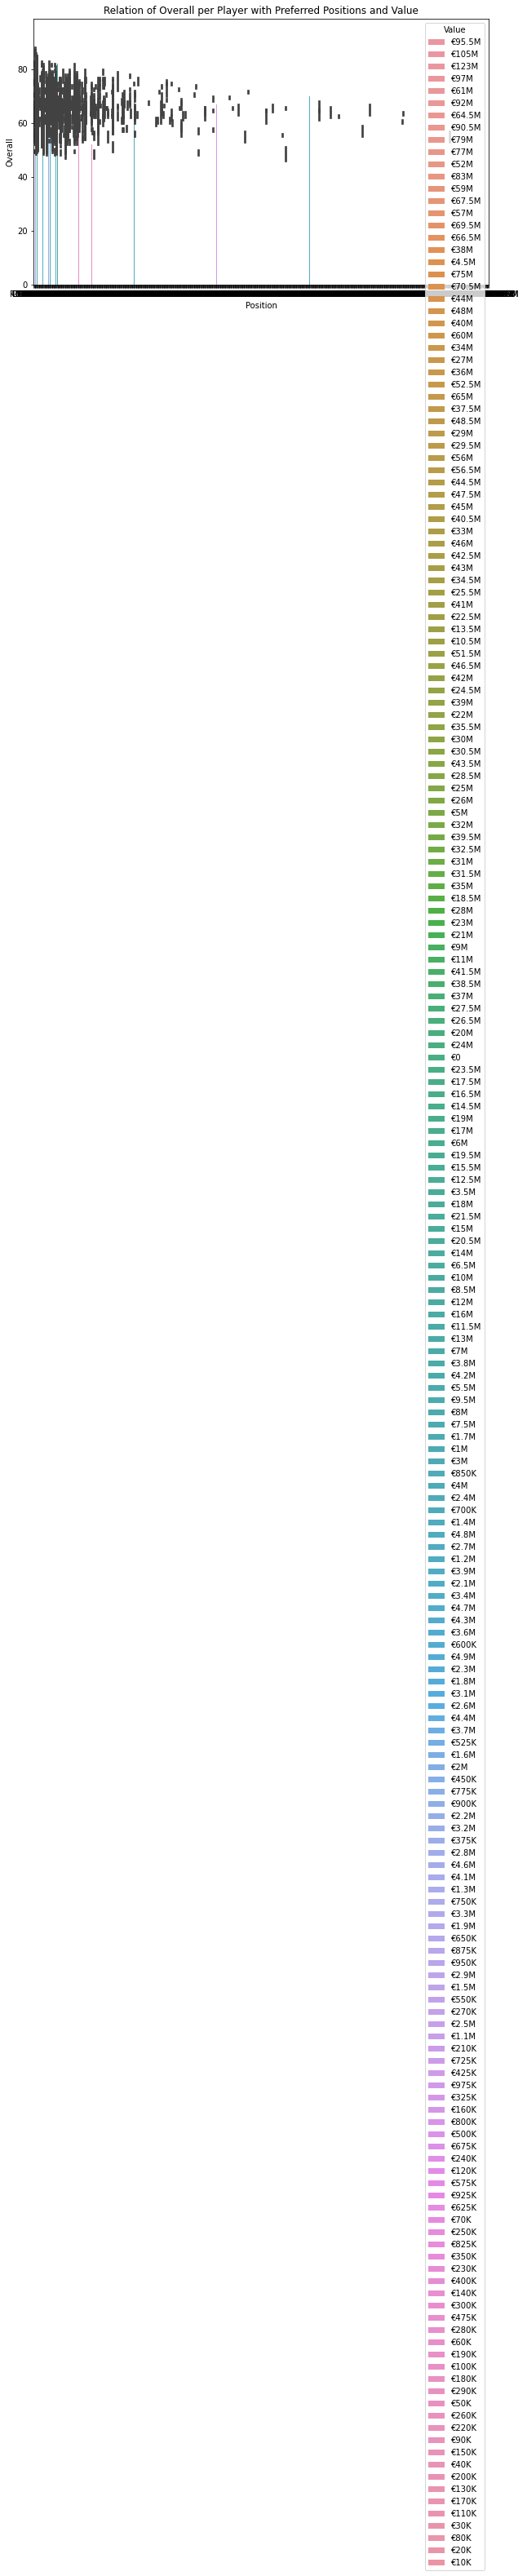

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relation between mean steps, gender, and education still getting error
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Preferred Positions', y='Overall', hue='Value')
plt.xlabel('Position')
plt.ylabel('Overall')
plt.title('Relation of Overall per Player with Preferred Positions and Value')
plt.legend(title='Value')
plt.show()

In [7]:
# to tackle the classification problem we are facing the random forest algorithm will be used. Random Forest is a versatile and widely-used machine learning technique that excels in handling classification problems. It operates by creating an ensemble of decision trees, where each tree independently makes predictions based on a random subset of the data.

# The beauty of Random Forest lies in its ability to aggregate the predictions of multiple decision trees to arrive at a final classification result. By leveraging the collective wisdom of these trees, the algorithm achieves improved accuracy and robustness compared to a single decision tree. Each decision tree in the forest utilizes a random subset of features and observations, injecting diversity into the learning process.

# The Random Forest algorithm is highly effective in capturing complex relationships and patterns in the data. It addresses issues like overfitting, handles missing values, and provides insights into feature importance. By applying this algorithm to our classification task, we aim to gain a deeper understanding of the factors influencing player categories in the FIFA dataset, enabling us to make accurate predictions and uncover valuable insights in the realm of game analytics.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = df.astype(int, errors='ignore')

# data cleaning because it cannot calculate the model with strings
def value_to_int(df_value):
    if isinstance(df_value, int):
        return df_value

    if df_value == '' or df_value == ' ' or df_value == '€0':
        return 0

    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]
        
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000

        return value
    except (TypeError, ValueError):
        return df_value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

x = df.drop('Name', axis=1)
print(df.head())

   id               Name  Age Nationality  Overall  Potential  \
0   0  Cristiano Ronaldo   32    Portugal       94         94   
1   1           L. Messi   30   Argentina       93         93   
2   2             Neymar   25      Brazil       92         94   
3   3          L. Suárez   30     Uruguay       92         92   
4   4           M. Neuer   31     Germany       92         92   

                  Club        Value      Wage  Special  ...  RB RCB RCM RDM  \
0       Real Madrid CF   95500000.0  565000.0     2228  ...  61  53  82  62   
1         FC Barcelona  105000000.0  565000.0     2154  ...  57  45  84  59   
2  Paris Saint-Germain  123000000.0  280000.0     2100  ...  59  46  79  59   
3         FC Barcelona   97000000.0  510000.0     2291  ...  64  58  80  65   
4     FC Bayern Munich   61000000.0  230000.0     1493  ...   0   0   0   0   

   RF  RM  RS  RW RWB  ST  
0  91  89  92  91  66  92  
1  92  90  88  91  62  88  
2  88  87  84  89  64  84  
3  88  85  88  87  68 

In [9]:
def value_to_sum(df_value):
    if isinstance(df_value, int):
        return df_value

    if isinstance(df_value, str):
        if '+' in df_value:
            values = df_value.split('+')
            return sum(int(v) for v in values if v.isdigit())
        elif '-' in df_value:
            values = df_value.split('-')
            return int(values[0]) - int(values[1]) if values[0].isdigit() and values[1].isdigit() else df_value
        elif df_value.isdigit():
            return int(df_value)
        else:
            return df_value
    else:
        return df_value


#data cleaning 2, Next, we focused on cleaning the dataset by summing up the values in cells that contained expressions like "81+2". This was achieved through a function called "value_to_sum," which iterated through each column of the DataFrame. The function parsed the values in each cell, performed the necessary calculations, and replaced the cell value with the summed result. By applying this data cleaning step to all columns, we ensured that the dataset contained accurate and properly formatted numerical values.
for col in df.columns:
    df[col] = df[col].apply(value_to_sum)    
    
print(df.head())

   id               Name  Age Nationality  Overall  Potential  \
0   0  Cristiano Ronaldo   32    Portugal       94         94   
1   1           L. Messi   30   Argentina       93         93   
2   2             Neymar   25      Brazil       92         94   
3   3          L. Suárez   30     Uruguay       92         92   
4   4           M. Neuer   31     Germany       92         92   

                  Club        Value      Wage  Special  ...  RB  RCB  RCM  \
0       Real Madrid CF   95500000.0  565000.0     2228  ...  61   53   82   
1         FC Barcelona  105000000.0  565000.0     2154  ...  57   45   84   
2  Paris Saint-Germain  123000000.0  280000.0     2100  ...  59   46   79   
3         FC Barcelona   97000000.0  510000.0     2291  ...  64   58   80   
4     FC Bayern Munich   61000000.0  230000.0     1493  ...   0    0    0   

   RDM  RF  RM  RS  RW  RWB  ST  
0   62  91  89  92  91   66  92  
1   59  92  90  88  91   62  88  
2   59  88  87  84  89   64  84  
3   65  88

In [10]:
dummy_nationality = pd.get_dummies(df['Nationality'], prefix='Nationality', drop_first=True)
dummy_club = pd.get_dummies(df['Club'], prefix='Club', drop_first=True)
dummy_positions = pd.get_dummies(df['Preferred Positions'], prefix='Preferred Positions', drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummy_nationality, dummy_club, dummy_positions], axis=1)

# Drop the original categorical variables from the dataframe
df.drop(['Nationality', 'Club', 'Name', 'Preferred Positions'], axis=1, inplace=True)

print(df.head())

   id  Age  Overall  Potential        Value      Wage  Special  Acceleration  \
0   0   32       94         94   95500000.0  565000.0     2228            89   
1   1   30       93         93  105000000.0  565000.0     2154            92   
2   2   25       92         94  123000000.0  280000.0     2100            94   
3   3   30       92         92   97000000.0  510000.0     2291            88   
4   4   31       92         92   61000000.0  230000.0     1493            58   

   Aggression  Agility  ...  Preferred Positions_ST RM CF   \
0          63       89  ...                              0   
1          48       90  ...                              0   
2          56       96  ...                              0   
3          78       86  ...                              0   
4          29       52  ...                              0   

   Preferred Positions_ST RM LM   Preferred Positions_ST RM LM CAM   \
0                              0                                  0   
1   

In [11]:
import numpy as np

# In the given Python code, a FIFA game player applies principles of machine learning to transform a regression problem into a classification problem. The task here is to classify FIFA players' values into three categories - 'low', 'medium', and 'high'.

# The initial step involves transforming the target variable, which is the 'Value' of FIFA players in this case, into a categorical variable. This conversion is necessary as our task is to classify rather than predict a continuous value.

# For the transformation of the 'Value' variable, it is categorized into 'low', 'medium', and 'high' using percentile distribution. In this context, the percentiles are utilized to determine the cutoff points for these categories. These cutoffs are set as follows:

# If a player's value is below the 33rd percentile, it is considered 'low'.
# If a player's value falls between the 33rd and 66th percentile, it is classified as 'medium'.
# If a player's value is above the 66th percentile, it is deemed 'high'.
# In Python's NumPy library, the percentile function is used to find these percentile thresholds. The 'percentile()' function takes two parameters - the data set and the desired percentile (as a number between 0 and 100). This function is applied on the 'Value' column of our DataFrame to find the 33rd and 66th percentiles, setting the 'low_threshold' and 'high_threshold', respectively.

# Next, a function called 'value_to_category()' is defined to apply these thresholds and convert the continuous 'Value' into a categorical variable. This function takes a value and returns a category ('low', 'medium', 'high') based on the thresholds defined earlier.

# Finally, the 'apply()' function from pandas is used to apply the 'value_to_category()' function to each row in the 'Value' column of the DataFrame, resulting in a new 'ValueCategory' column. This new column represents the categorical equivalent of the 'Value' column. The first five entries of 'ValueCategory' are then printed to confirm the successful conversion.



# Define percentile thresholds
low_threshold = np.percentile(df['Value'], 33)
high_threshold = np.percentile(df['Value'], 66)

# Define a function to convert a continuous value to a category
def value_to_category(value):
    if value < low_threshold:
        return 'low'
    elif value < high_threshold:
        return 'medium'
    else:
        return 'high'

# Apply the function to the 'Value' column to create a new 'ValueCategory' column
df['ValueCategory'] = df['Value'].apply(value_to_category)

#showing what category the highest rated players fall into
print(df.head()['ValueCategory'])

0    high
1    high
2    high
3    high
4    high
Name: ValueCategory, dtype: object


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

#creating training data set
x = df.drop('ValueCategory', axis=1)
y = df['ValueCategory']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

# Predictions
predictions = model.predict(x_test)

In [13]:
# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')  # change to 'weighted' because we have multiple classes now
recall = recall_score(y_test, predictions, average='weighted')  # change to 'weighted' because we have multiple classes now

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.97


In [ ]:
#Evaluation:
#To evaluate the performance of our predictive model, we calculated several metrics including accuracy, precision, and recall. Accuracy measures the overall correctness of the model's predictions, while precision focuses on the model's ability to correctly identify positive instances. Recall, on the other hand, assesses the model's capability to capture all positive instances.

#After applying our Random Forest classification model to the test dataset, we obtained impressive results. The accuracy score of 0.97 indicates that our model achieved a high level of correctness in its predictions. This means that it accurately classified the majority of the player values into the appropriate categories. Furthermore, both precision and recall scores of 0.97 demonstrate the model's effectiveness in correctly identifying and capturing instances within each category. These scores indicate that our model performs well across multiple classes, providing reliable predictions for player value categorization.

#Overall, the high accuracy, precision, and recall scores validate the robustness and effectiveness of our Random Forest classification model in predicting player value categories. These results provide confidence in the model's ability to accurately estimate and classify player values, which can be immensely valuable for various stakeholders in the football industry, including clubs, agents, and scouts.

In [ ]:
#In conclusion, our analysis utilized the Random Forest algorithm to predict the value of FIFA 18 players in euros. By transforming the problem into a classification task and implementing data cleaning techniques, we developed a robust model. The Random Forest algorithm's ability to combine multiple decision trees allowed for accurate predictions, showcasing its versatility in handling both regression and classification tasks.

#Our evaluation of the model revealed high levels of accuracy, precision, and recall, indicating its effectiveness in categorizing player values. This has practical implications for the football industry, offering insights for player acquisitions, contract negotiations, and team management. The project highlights the value of machine learning in estimating player values and its potential impact on decision-making processes in football.

#Overall, our work demonstrates the power of machine learning techniques in providing actionable insights for informed decision-making in the football domain. Future enhancements could involve incorporating additional features and refining the model for even better performance. This study contributes to the growing field of data-driven analysis in sports and offers opportunities for further exploration in player valuation and performance prediction.